In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import abspath
import pandas as pd
import numpy as np
import os

In [2]:
save = True

In [3]:
savedir = abspath('./stimuli_csvs')
os.makedirs(savedir, exist_ok=True)

figdir = abspath('../results_paper/SupplementaryInformation')

In [4]:
conditions = ['Original', 'Scr1', 'Scr3', 'Scr5', 'Scr7', 'backward', 'lowPMI', 'lowPMI_random', 'random']

# Load and combine dataframes

In [5]:
print(os.getcwd())
d = pd.read_csv(os.path.join(savedir, "2_pPMI_lag2_Original.csv"), header=None)
d.columns = ["stimulus_id", "condition", "stimulus", "pPMI_lag2"]
d

/rdma/vast-rdma/vast/cpl/ckauf/perturbed-neural-nlp/analysis/pmi_verification


,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.818162
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.696148
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.620643
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.630431
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.342314
...,...,...,...,...
622,384sentences.379,Original,some windows have multiple panes to increase i...,1.567834
623,384sentences.380,Original,a woman is a female human adult,2.380797
624,384sentences.381,Original,a woman is stereotypically seen as a caregiver,2.078603
625,384sentences.382,Original,a woman can become pregnant and bear children,2.112874


In [6]:
frames = []
for cond in conditions:
    for filename in os.listdir(savedir):
        if filename == "2_pPMI_lag2_{}.csv".format(cond):
            print(filename)
            d = pd.read_csv(os.path.join(savedir, "2_pPMI_lag2_{}.csv".format(cond)), header=None)
            d.columns = ["stimulus_id", "condition", "stimulus", "pPMI_lag2"]
            frames.append(d)
data = pd.concat(frames)

2_pPMI_lag2_Original.csv
2_pPMI_lag2_Scr1.csv
2_pPMI_lag2_Scr3.csv
2_pPMI_lag2_Scr5.csv
2_pPMI_lag2_Scr7.csv
2_pPMI_lag2_backward.csv
2_pPMI_lag2_lowPMI.csv
2_pPMI_lag2_lowPMI_random.csv
2_pPMI_lag2_random.csv


In [7]:
data

,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.818162
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.696148
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.620643
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.630431
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.342314
...,...,...,...,...
622,384sentences.379,random,handle landscapes had cause use rock united ti...,0.293298
623,384sentences.380,random,tuxedo in hours and steep dorsal a,1.022294
624,384sentences.381,random,entranceway immaturely visual at compound farm...,1.103148
625,384sentences.382,random,are or can and an air and did,0.515124


# Prepare plotting

In [8]:
ppmi_mean = list()
ppmi_mean_errors = list()

print(len(conditions))
for condition in conditions:
    #subset dataframe
    curr_df = data.loc[data['condition']==condition]
    print(condition)
    #calculate mean & std
    curr_mean = np.mean(list(curr_df['pPMI_lag2']))
    curr_std = np.std(list(curr_df['pPMI_lag2']))
    #save
    print(f'Mean pPMI: {curr_mean}')
    print(f'Std: {curr_mean}')
    print('\n')
    ppmi_mean.append(curr_mean)
    ppmi_mean_errors.append(curr_std)

9
Original
Mean pPMI: 1.8084014077836281
Std: 1.8084014077836281


Scr1
Mean pPMI: 1.8173729491104322
Std: 1.8173729491104322


Scr3
Mean pPMI: 1.8249059332588926
Std: 1.8249059332588926


Scr5
Mean pPMI: 1.7962933867730613
Std: 1.7962933867730613


Scr7
Mean pPMI: 1.7584293561694178
Std: 1.7584293561694178


backward
Mean pPMI: 1.8084014077836281
Std: 1.8084014077836281


lowPMI
Mean pPMI: 1.2580381188910663
Std: 1.2580381188910663


lowPMI_random
Mean pPMI: 1.1394410343919394
Std: 1.1394410343919394


random
Mean pPMI: 0.7986275541989883
Std: 0.7986275541989883




# Plot

In [9]:
#define global figure settings
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 'ytick.left': True,
                 'xtick.bottom': True,
                 'grid.linestyle': "",  # gets rid of horizontal lines
                 # set tick width
                 'xtick.major.size': 20,
                 'xtick.major.width': 4,
                 'xtick.minor.size': 10,
                 'xtick.minor.width': 2,
                 'ytick.major.size': 20,
                 'ytick.major.width': 4,
                 'ytick.minor.size': 10,
                 'ytick.minor.width': 2
                 }

In [10]:
#rename conditions
data['condition'] = data['condition'].replace(
    {'Scr1': '1LocalWordSwap',
    'Scr3': '3LocalWordSwaps',
    'Scr5': '5LocalWordSwaps',
    'Scr7': '7LocalWordSwaps',
    'backward' : 'ReverseOrder',
     'lowPMI' : 'LowPMI',
     'lowPMI_random' : 'LowPMIRand',
     'random':'RandWordList'}
    )

In [11]:
#define colors
CAT2COLOR = {
    "original": "dimgray",
    #
    "word-order": sns.cubehelix_palette(7, start=.2, rot=-.25, dark=0.2, light=.9, reverse=True),
    #
    "control": "lightgray"
}

colors = colors = [CAT2COLOR["original"]] + CAT2COLOR["word-order"] + [CAT2COLOR["control"]]

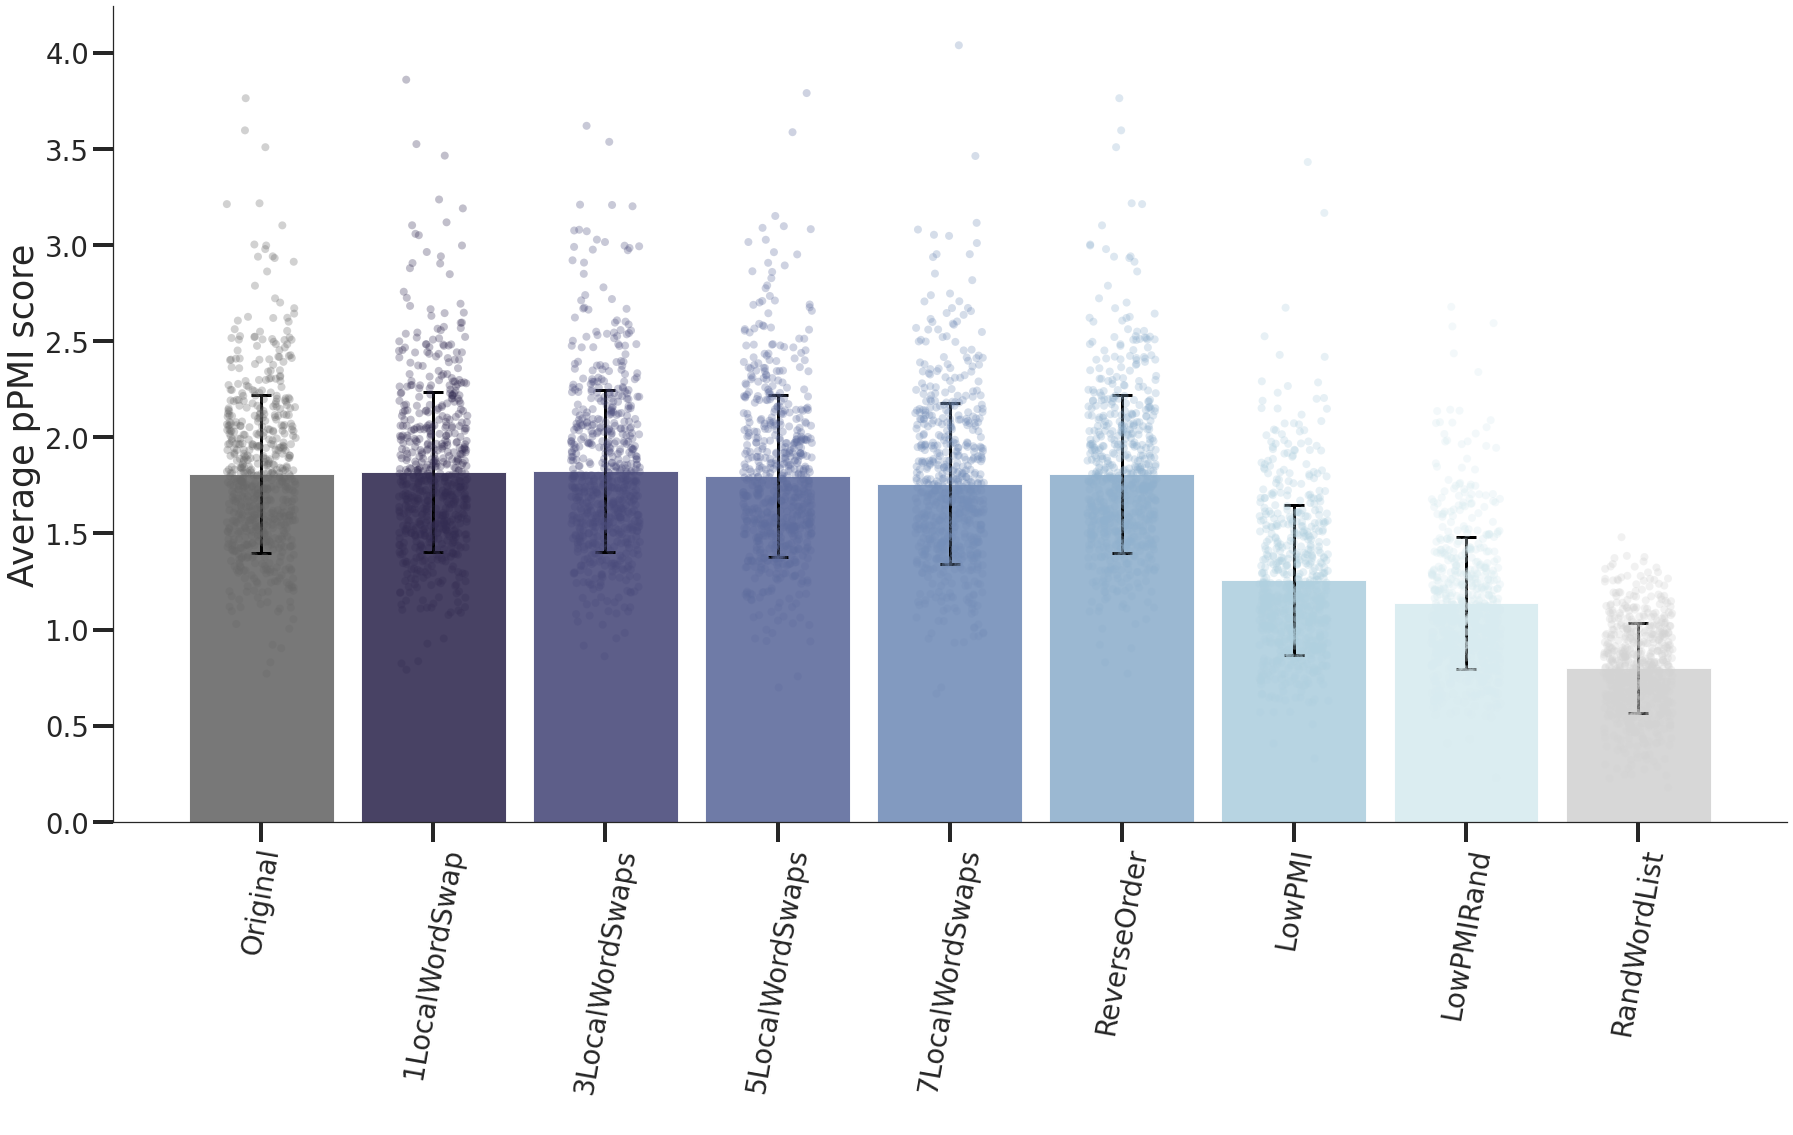

In [12]:
sns.set_theme(font_scale=2.5, style="white", rc=custom_params, palette=colors)

fig_dims=(30,15)
fig, ax = plt.subplots(figsize=fig_dims)
capsize = 10

sns.stripplot(x="condition", y="pPMI_lag2",data=data, alpha=0.3, palette = colors, \
              dodge=True, ax=ax, jitter=0.2, s = 8)
#space = np.linspace(-len(conditions)/2,len(conditions)/2,len(conditions))
width = (1/float(len(conditions)/10))/1.32
bar_ind = np.arange(len(conditions))
for ind, ppmi in enumerate(ppmi_mean):
    p1 = ax.bar(bar_ind[ind], ppmi, width,yerr=ppmi_mean_errors[ind], #edgecolor='black',
                error_kw=dict(lw=3, capsize=capsize, capthick=3), alpha = 0.9)

ax.set(ylabel='Average pPMI score',xlabel=' ')
ax.tick_params(axis='x', rotation=80)
ax.yaxis.get_label().set_fontsize(35)
ax.tick_params(axis='y')

if save:
    plt.savefig(os.path.join(figdir,'pmi_verification_scr.svg'), dpi=180)
    plt.savefig(os.path.join(figdir,'pmi_verification_scr.png'), dpi=180, bbox_inches='tight')

In [21]:
data

,stimulus_id,condition,stimulus,pPMI_lag2
0,243sentences.0,Original,beekeeping encourages the conservation of loca...,1.818162
1,243sentences.1,Original,it is in every beekeeper's interest to conserv...,1.696148
2,243sentences.2,Original,as a passive form of agriculture it does not r...,1.620643
3,243sentences.3,Original,beekeepers also discourage the use of pesticid...,1.630431
4,243sentences.4,Original,artisanal beekeepers go to extremes for their ...,1.342314
...,...,...,...,...
622,384sentences.379,RandWordList,handle landscapes had cause use rock united ti...,0.293298
623,384sentences.380,RandWordList,tuxedo in hours and steep dorsal a,1.022294
624,384sentences.381,RandWordList,entranceway immaturely visual at compound farm...,1.103148
625,384sentences.382,RandWordList,are or can and an air and did,0.515124


# T-test

In [13]:
from scipy.stats import ttest_ind

cat1 = data[data['condition']=='Original']
cat2 = data[data['condition']=='1LocalWordSwap']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=-0.38416542437271783, pvalue=0.7009210782829942)

In [14]:
cat1 = data[data['condition']=='Original']
cat2 = data[data['condition']=='7LocalWordSwaps']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=2.1354240403712366, pvalue=0.03292000036042696)

In [15]:
cat1 = data[data['condition']=='7LocalWordSwaps']
cat2 = data[data['condition']=='LowPMI']

ttest_ind(cat1['pPMI_lag2'], cat2['pPMI_lag2'])

Ttest_indResult(statistic=21.868994153302843, pvalue=4.732422666704868e-90)

The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. 

In [16]:
#!pip3 install scikit_posthocs

In [17]:
import scipy.stats as stats
import scikit_posthocs as sp

In [18]:
conditions = list(data['condition'])

In [19]:
sns.set_theme(font_scale=1.5, style="white", rc=custom_params, palette=colors)

5643
ANOVA F-statistic and p-value: (-6.239271371414503e-31, nan)


,Original,1LocalWordSwap,3LocalWordSwaps,5LocalWordSwaps,7LocalWordSwaps,ReverseOrder,LowPMI,LowPMIRand,RandWordList
Original,1.000000e+00,7.421517e-01,5.797369e-01,6.822741e-01,4.740480e-02,1.000000e+00,1.000842e-106,2.073845e-158,0.000000e+00
1LocalWordSwap,7.421517e-01,1.000000e+00,7.719855e-01,4.797744e-01,1.956070e-02,7.421517e-01,3.263556e-108,1.605836e-159,0.000000e+00
3LocalWordSwaps,5.797369e-01,7.719855e-01,1.000000e+00,3.068657e-01,8.474707e-03,5.797369e-01,3.524756e-109,4.911894e-160,3.557273e-322
5LocalWordSwaps,6.822741e-01,4.797744e-01,3.068657e-01,1.000000e+00,1.530085e-01,6.822741e-01,1.332873e-100,1.542290e-150,2.082526e-312
7LocalWordSwaps,4.740480e-02,1.956070e-02,8.474707e-03,1.530085e-01,1.000000e+00,4.740480e-02,8.966696e-90,1.858373e-138,1.437972e-300
ReverseOrder,1.000000e+00,7.421517e-01,5.797369e-01,6.822741e-01,4.740480e-02,1.000000e+00,1.000842e-106,2.073845e-158,0.000000e+00
LowPMI,1.000842e-106,3.263556e-108,3.524756e-109,1.332873e-100,8.966696e-90,1.000842e-106,1.000000e+00,2.680010e-08,5.159876e-113
LowPMIRand,2.073845e-158,1.605836e-159,4.911894e-160,1.542290e-150,1.858373e-138,2.073845e-158,2.680010e-08,1.000000e+00,3.518282e-80
RandWordList,0.000000e+00,0.000000e+00,3.557273e-322,2.082526e-312,1.437972e-300,0.000000e+00,5.159876e-113,3.518282e-80,1.000000e+00


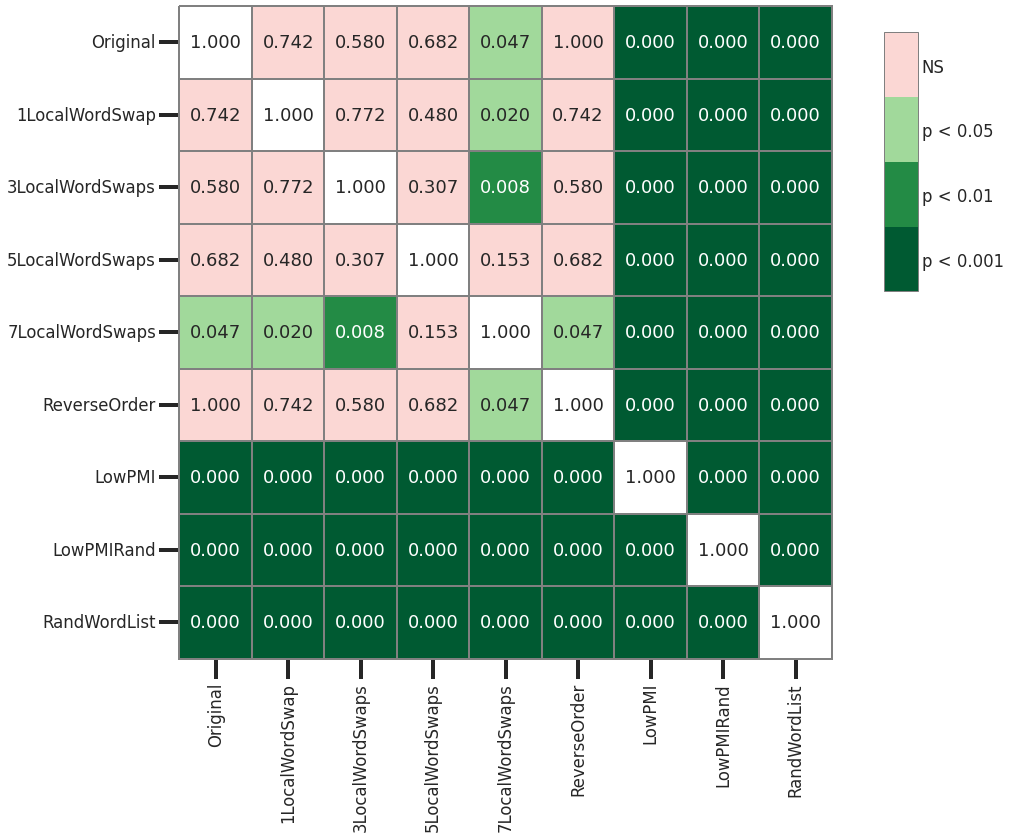

In [20]:
# Plot arguments
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.95, 0.55, 0.04, 0.3]}

def anova_ttest():
    liste = []
    #print(conditions)
    for condition in conditions:
        curr_df = data.loc[data['condition'] == condition]
        cat = np.array(curr_df['pPMI_lag2'])
        liste.append(cat)
    print(len(liste))
    F, p = stats.f_oneway(liste[0],liste[1],liste[2],liste[3],liste[4],liste[5],liste[6],
                         liste[7],liste[8],liste[9])
    print(f'ANOVA F-statistic and p-value: {F,p}')
    
    ttest = sp.posthoc_ttest(data, val_col='pPMI_lag2', group_col='condition', p_adjust='fdr_bh')
    plt.figure(figsize=(12,12))
    sp.sign_plot(ttest, annot=ttest, fmt='.3f', **heatmap_args)
    #plt.title('Pereira 2018 | pPMI across conditions', fontsize=title_size)
    #plt.subplots_adjust(top=0.8) 
    
    if save:
        ttest.to_csv("pmi_verification_scr_stats.csv")
        plt.savefig(os.path.join(figdir,'pmi_verification_scr_stats.svg'), dpi=180)
        plt.savefig(os.path.join(figdir,'pmi_verification_scr_stats.png'), dpi=180, bbox_inches='tight')

    return ttest
anova_ttest()